# About Dataset

## Context  
E-commerce telah menjadi saluran baru untuk mendukung perkembangan bisnis. Melalui e-commerce, bisnis dapat mengakses dan membangun kehadiran pasar yang lebih luas dengan menyediakan saluran distribusi yang lebih murah dan efisien untuk produk atau layanan mereka. E-commerce juga telah mengubah cara orang berbelanja dan mengonsumsi produk serta layanan. Banyak orang beralih ke komputer atau perangkat pintar mereka untuk memesan barang yang dapat dengan mudah dikirim ke rumah mereka.

## Content  
Dataset ini merupakan data transaksi penjualan dari e-commerce berbasis di Inggris (ritel online) selama satu tahun. Toko yang berbasis di London ini telah menjual hadiah dan peralatan rumah tangga untuk dewasa dan anak-anak melalui situs web sejak 2007. Pelanggannya berasal dari seluruh dunia dan biasanya melakukan pembelian langsung untuk diri mereka sendiri. Ada juga bisnis kecil yang membeli dalam jumlah besar dan menjual kembali melalui saluran ritel.

Dataset ini berisi **500.000 baris dan 8 kolom**. Berikut adalah deskripsi masing-masing kolom:

- **TransactionNo** *(categorical)*: Nomor unik enam digit yang mendefinisikan setiap transaksi. Huruf "C" dalam kode menunjukkan pembatalan.  
- **Date** *(numeric)*: Tanggal ketika setiap transaksi dibuat.  
- **ProductNo** *(categorical)*: Karakter unik lima atau enam digit yang digunakan untuk mengidentifikasi suatu produk tertentu.  
- **Product** *(categorical)*: Nama produk atau barang.  
- **Price** *(numeric)*: Harga setiap produk per unit dalam pound sterling (£).  
- **Quantity** *(numeric)*: Jumlah setiap produk dalam setiap transaksi. Nilai negatif terkait dengan transaksi yang dibatalkan.  
- **CustomerNo** *(categorical)*: Nomor unik lima digit yang mendefinisikan setiap pelanggan.  
- **Country** *(categorical)*: Nama negara tempat pelanggan tinggal.  

Terdapat persentase kecil pembatalan pesanan dalam dataset ini. Sebagian besar pembatalan disebabkan oleh kondisi stok habis pada beberapa produk. Dalam situasi ini, pelanggan cenderung membatalkan pesanan karena mereka ingin semua produk dikirim sekaligus.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('..\dataset\e-commerce-transaction.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [3]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [5]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['CustomerNo'] = df['CustomerNo'].astype(str)
df = df.dropna(subset=['CustomerNo'])

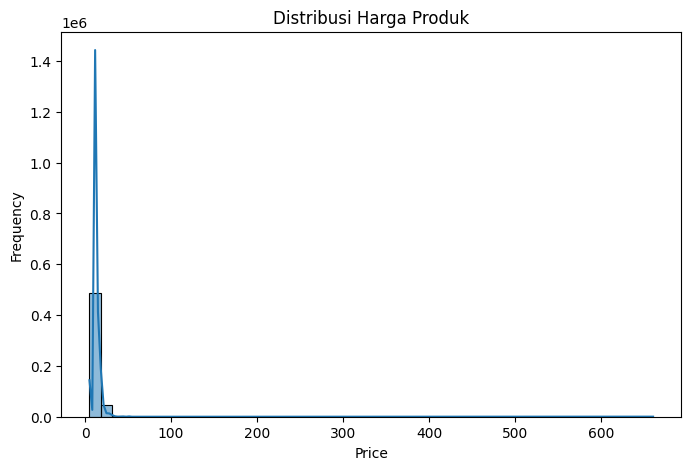

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribusi Harga Produk')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

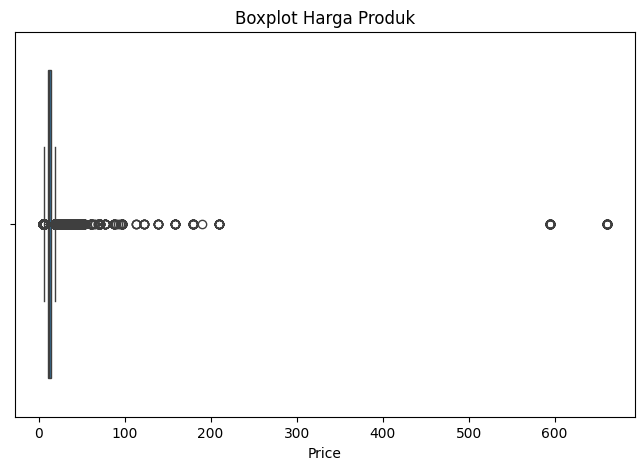

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Price'])
plt.title('Boxplot Harga Produk')
plt.show()

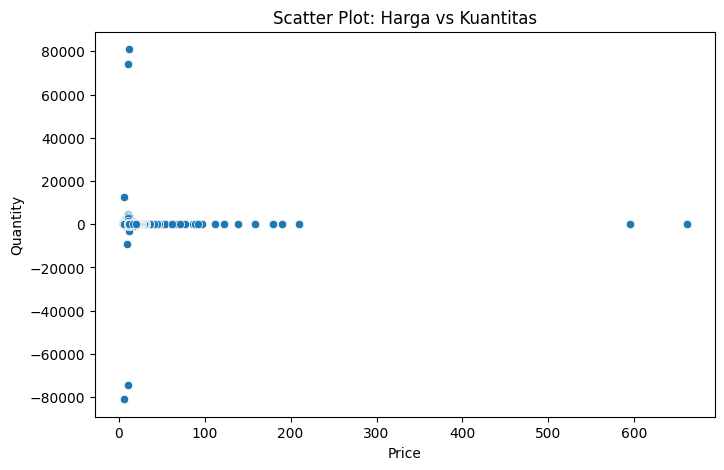

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Price'], y=df['Quantity'])
plt.title('Scatter Plot: Harga vs Kuantitas')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()


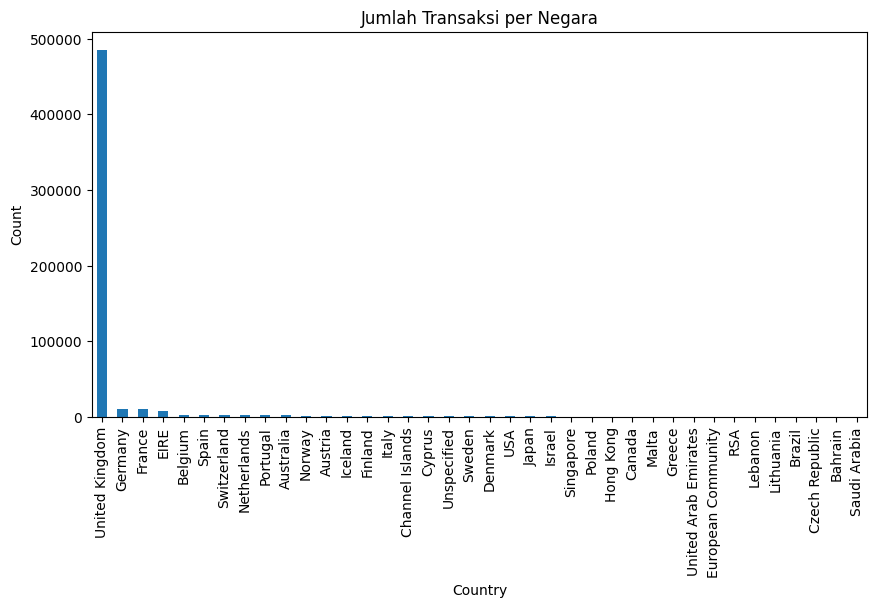

In [12]:
plt.figure(figsize=(10,5))
df['Country'].value_counts().plot(kind='bar')
plt.title('Jumlah Transaksi per Negara')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [14]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

**IsolationForest** : Digunakan karena lebih cocok untuk data high dimensional dan untuk cek anomali tidak perlu label.

**StandardScaler** : Digunakan karena untuk menghilangkan skala yang berbeda, Harga (Price) dan Kuantitas (Quantity) memiliki rentang nilai yang berbeda jauh. Model seperti Isolation Forest lebih efektif jika semua fitur memiliki distribusi yang serupa. Tanpa standarisasi, model mungkin lebih fokus pada fitur dengan skala besar daripada pola sebenarnya dalam data.

In [15]:
# Standarisasi data sebelum model
X = df[['Price', 'Quantity']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X_scaled)

In [17]:
mean_price = df['Price'].mean()
std_price = df['Price'].std()
anomaly_threshold = mean_price + 2 * std_price
df['Anomaly_StdDev'] = df['Price'] > anomaly_threshold

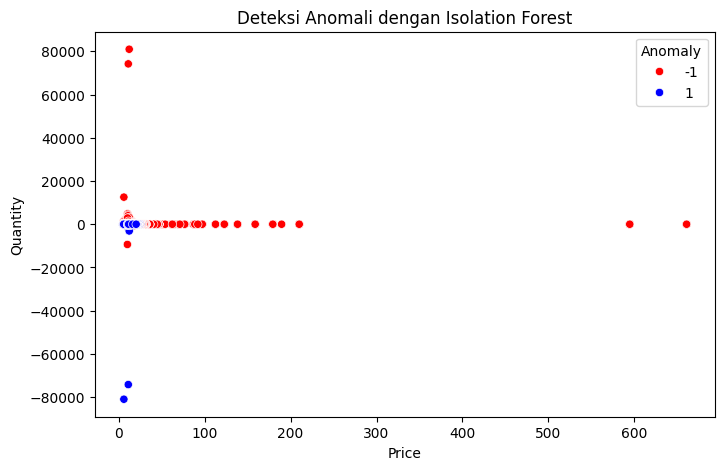

In [18]:
# Visualisasi hasil deteksi anomali dengan Isolation Forest
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Price'], y=df['Quantity'], hue=df['Anomaly'], palette={1:'blue', -1:'red'})
plt.title('Deteksi Anomali dengan Isolation Forest')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

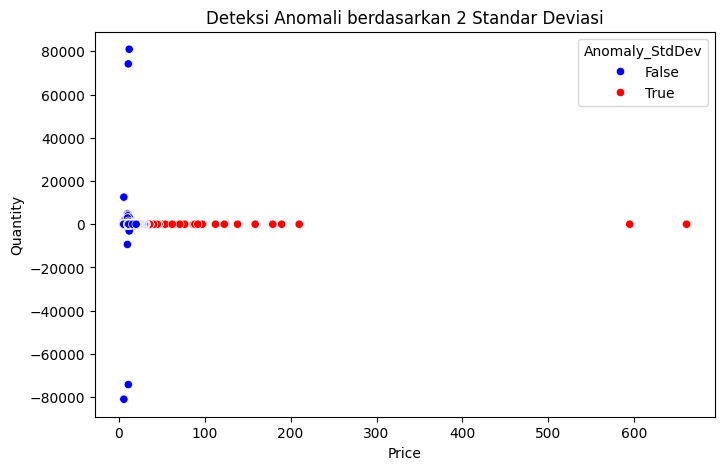

In [19]:
# Visualisasi anomali berdasarkan 2 standar deviasi
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Price'], y=df['Quantity'], hue=df['Anomaly_StdDev'], palette={True:'red', False:'blue'})
plt.title('Deteksi Anomali berdasarkan 2 Standar Deviasi')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

In [ ]:
# Menampilkan transaksi anomali
anomalies = df[df['Anomaly'] == -1]
print(anomalies.head())

   TransactionNo       Date ProductNo                         ProductName  \
0         581482 2019-12-09     22485       Set Of 2 Wooden Market Crates   
24        581476 2019-12-09     23167       Small Ceramic Top Storage Jar   
30        581476 2019-12-09     22998        Travel Card Wallet Keep Calm   
38        581476 2019-12-09     22693  Grow A Flytrap Or Sunflower In Tin   
45        581476 2019-12-09     22197                      Popcorn Holder   

    Price  Quantity CustomerNo         Country  Anomaly  Anomaly_StdDev  
0   21.47        12    17490.0  United Kingdom       -1           False  
24  10.96        96    12433.0          Norway       -1           False  
30  10.68        72    12433.0          Norway       -1           False  
38  11.34       192    12433.0          Norway       -1           False  
45  10.99       100    12433.0          Norway       -1           False  
